In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
   Reddit Dataset - Exploratory Data Analysis
'''

# Ownership
__author__ = ["M. Haseeb Hassan"]
__copyright__ = ["Copyrights @ hacceebhassan"]
__license__ = "MIT"
__version__ = "1.0.1"
__maintainer__ = "M. Haseeb Hassan"
__email__ = "hacceebhassan@gmail.com"
__status__ = "Development"

In [3]:
# Importing Modules
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Data Analysis**

*This section includes all the essential analysis and visualizations. Each visualization gives unique insight into the data and each plot can be used to get idea about what's going on inside the excel file.*

In [4]:
# Reading the compiled csv file
df_ = pd.read_csv("data/dataset.csv") 
df = df_.dropna()
df.head()

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
# Function to work plotly on Colab
# Have to run it in every cell plotly will be used
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Sarcastic vs Non-sarcastic Distribution

*The first step of binary classified data is to check the distribution of the both classes. In our case, we have Sarcastic(1) and Non-sarcastic(0) and their distribution is 50%*

In [ ]:
import plotly as py
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

configure_plotly_browser_state()

# Make pie chart to compare the numbers of sarcastic and not-sarcastic headlines
labels = ['Sarcastic', 'Not Sarcastic']
count_sarcastic = len(df[df['label']==1])
count_notsar = len(df[df['label']==0])
values = [count_sarcastic, count_notsar]
# values = [20,50]

trace = go.Pie(labels=labels,
               values=values,
               textfont=dict(size=19, color='#FFFFFF'),
               marker=dict(
                   colors=['#DB0415', '#2424FF'] 
               )
              )

layout = go.Layout(title = '<b>Sarcastic vs Not Sarcastic</b>')
data = [trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig)

*Well it seems that our data has balanced number on each category in the compiled dataframe. This is fair for the ML model as it's a binary classification task. Also, there'll be no need to check accuracy of the ML model for both labels.*

### Yearly Sarcasm Rate 

*This section provides insights into the Year column. This section will show different means, maximum and minimum values, as well as overall sarcasm rate of the data.*

In [ ]:
df_yearly = df.copy()

df_yearly['date'] = pd.to_datetime(df_yearly['date'],yearfirst=True)
df['year'] = df_yearly['date'].apply(lambda d: d.year)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Getting Yearly Distribution
comments_by_year = df.groupby('year')['label'].agg([np.sum,np.mean])
comments_by_year

,sum,mean
year,,
2009,1348,0.585578
2010,3703,0.564310
2011,8722,0.548761
2012,18226,0.533064
2013,42836,0.537129
2014,91725,0.533592
2015,186261,0.520566
2016,278342,0.468619


Text(0.5, 1.0, 'Rate of Sarcasm on Reddit')

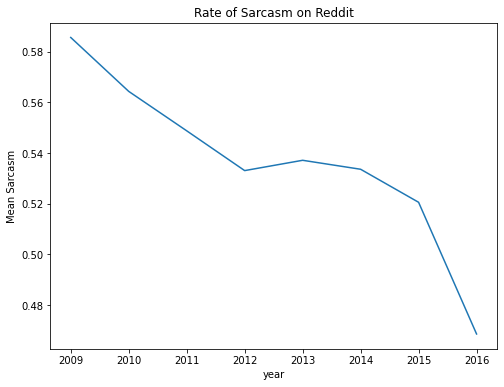

In [ ]:
# Plotting the Distribution
plt.figure(figsize=(8,6))
comments_by_year['mean'].plot(kind='line')
plt.ylabel('Mean Sarcasm')
plt.title('Rate of Sarcasm on Reddit')

*Over the years, the sarcasm mean has decreased. Maybe due to the fact that earlier, a simpler joke was considered sarcastic but now the sarcastic language is on another level. Therefore fewer comments qualify as sarcastic comments. But maybe the data we have is till 2016 and the social media is becoming more and more important since than. So, the dataset for 2020 would have presented a different picture for sure.*

### Overview of the Data

*This section involves correlation matrix and different scatter plots between all the columns. This section gives deep insights into the whole dataset.*

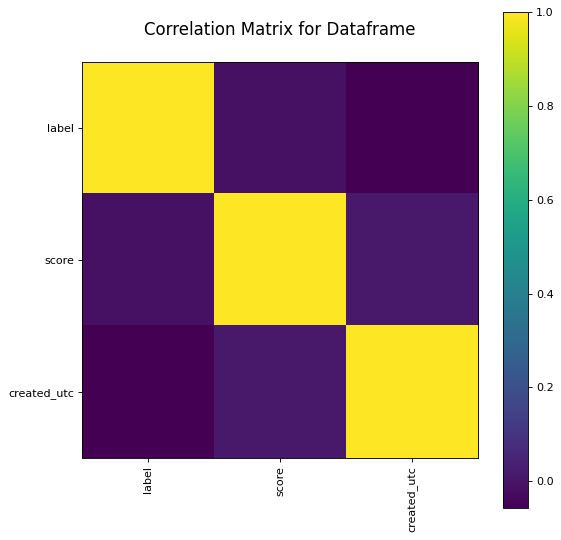

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Dataframe', fontsize=15)
    plt.show()

# Plot Correlation Matrix
plotCorrelationMatrix(df, 8)

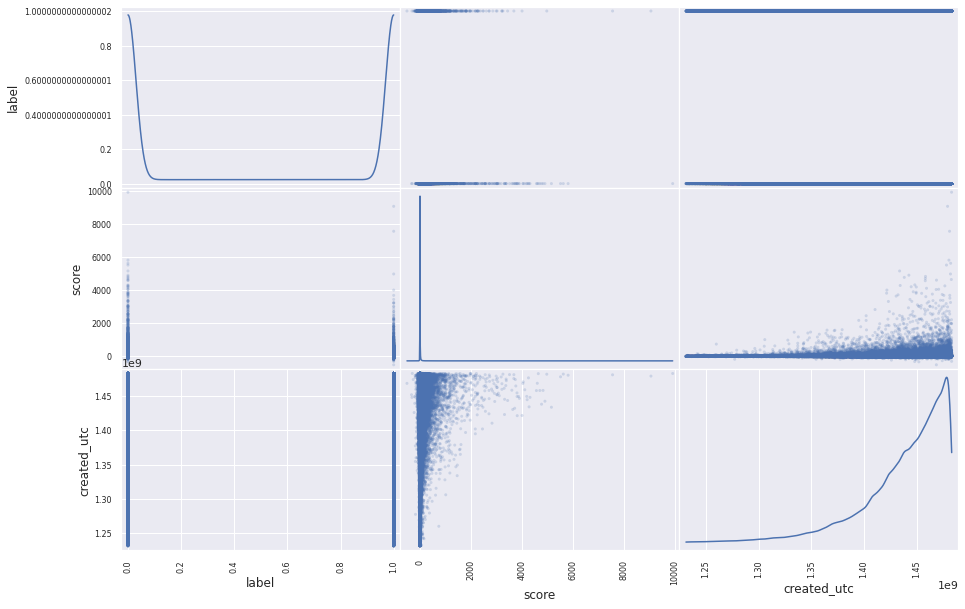

In [ ]:
# The scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(15, 10), diagonal='kde');

*The correlation matrix gives us the relation between different columns. The color scheme shows how they are dependent upon each other. This helps to understands a bigger picture about the dataset.
The scatter matrix is showing a number of relationships between different columns and we can tell a lot about each plot in the matrix. The sactter matrix gives great insight into the data.*

### Authors Exploration

*The authors exploration is an important part of EDA. The top10 authors of sarcastic comments / non-sarcastic comments are identified here along with their number of comments.*

In [ ]:
# Dropping irrelevant columns to save runtime
df_auth = df.drop(['subreddit', 'score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_auth

,label,comment,author
0,0,NC and NH.,Trumpbart
1,0,You do know west teams play against west teams...,Shbshb906
2,0,"They were underdogs earlier today, but since G...",Creepeth
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha
4,0,I could use one of those tools.,cush2push
...,...,...,...
1262429,1,Respect your elders you little snot.,Tiffany_Butler
1262430,1,I'm just glad they won't be using taxpayer mon...,harryballsagna
1262431,1,what.. with this awesome narration?,aberant
1262432,1,He looks trustworthy.,permaculture


In [ ]:
# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_auth_sarc = df_auth.loc[df_auth['label'] == 1]
df_auth_nsarc = df_auth.loc[df_auth['label'] == 0]

Text(0, 0.5, 'Number of Sarcastic Comments')

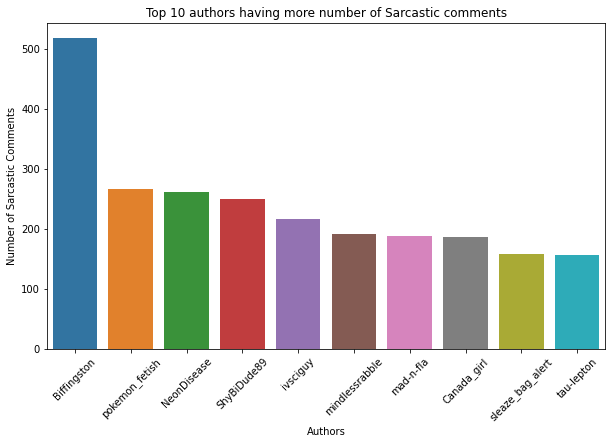

In [ ]:
# Plotting Top 10 authors for sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_sarc, 
                      order = df_auth_sarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Sarcastic Comments')

Text(0, 0.5, 'Number of Non-Sarcastic Comments')

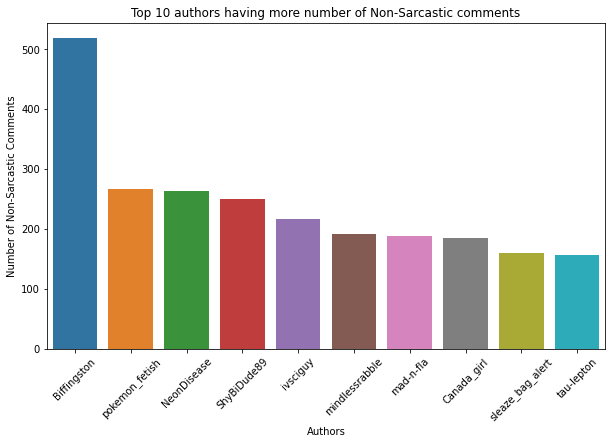

In [ ]:
# Plotting top 10 authors for non-sarcastic comments
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = df_auth_nsarc, 
                      order = df_auth_nsarc.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of Non-Sarcastic comments')
plt.xlabel('Authors')
plt.ylabel('Number of Non-Sarcastic Comments')

*It's pretty straight forward. The top 10 authors for sarcastic as well as non-sarcastic comments. As we have same distribution of sarcastic and non-sarcastic comments. It's interesting fact even the authors are having same distribution over sarcastic and non-sarcastic comments*

### Scores Exploration

*The scores are one of the most necessary column of the dataset. In this section, I have calclated certain values as well as visualizations. The distributions about scores columns give us a clear difference between sarcastic scores and non-sarcastic scores*

In [ ]:
# Maximum and Minimum Score
print('Maximum Score :', df['score'].max())
print('----------')
print('Minimum Score :', df['score'].min())


Maximum Score : 9923
----------
Minimum Score : -507


In [ ]:
# Mean and STD of Score Rating

mean = df['score'].mean()
std = df['score'].std()
print('Mean Score :', mean)
print('----------')
print('Standard Deviation :', std)


Mean Score : 6.860435198321882
----------
Standard Deviation : 48.365664877557215


Text(0.5, 1.0, 'Scores for Sarcastic vs. None-Sarcastic Comments')

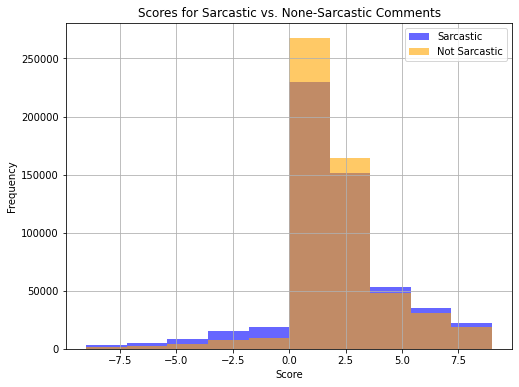

In [ ]:
# Distribution of Scores for Sarcastic and Non-Sarcastic Comments

plt.figure(figsize=(8,6))
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==1)]['score'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==0)]['score'].hist(alpha=0.6,label='Not Sarcastic', color = 'orange')
plt.yscale('linear')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Scores for Sarcastic vs. None-Sarcastic Comments')

Text(0.5, 1.0, 'LogBase10-Scores for Sarcastic vs. None-Sarcastic Comments')

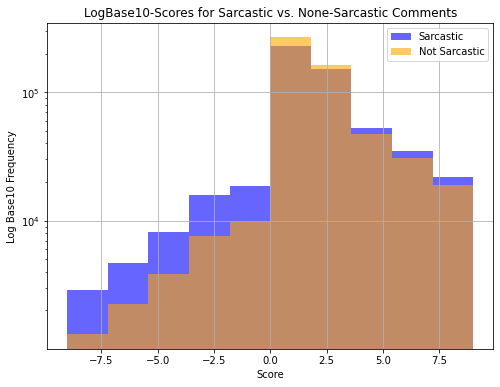

In [ ]:
# Distribution of LogBase10 Scores for Sarcastic and Non-Sarcastic Comments 

plt.figure(figsize=(8,6))
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==1)]['score'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[(df['score'].abs()<(10-((df['score'].abs()-mean)/std))) & (df['label']==0)]['score'].hist(alpha=0.6,label='Not Sarcastic', color = 'orange')
plt.yscale('log')
plt.ylabel('Log Base10 Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('LogBase10-Scores for Sarcastic vs. None-Sarcastic Comments')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Natural Log Length of Comments')

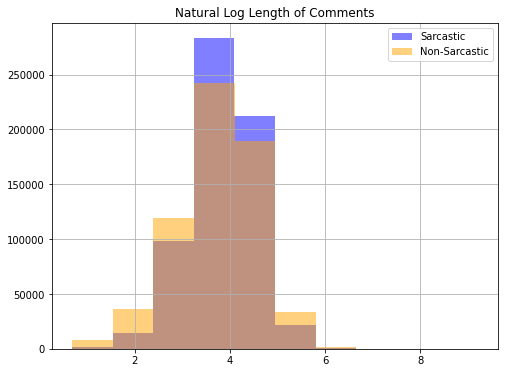

In [ ]:
# Natural Log Length of Comments for Sarcastic and Non-Sarcastic Comments

plt.figure(figsize=(8,6))
df['log_comment'] = df['comment'].apply(lambda text: np.log1p(len(text)))
df[df['label']==1]['log_comment'].hist(alpha=0.5,label='Sarcastic', color = 'blue')
df[df['label']==0]['log_comment'].hist(alpha=0.5,label='Non-Sarcastic', color = 'orange')
plt.legend()
plt.title('Natural Log Length of Comments')

*Score is an important column for comments. Therefore I have tried to get more insights by studying different types of distributions. The sarcastic comments have higher score distribution as compared to the non-sarcastic.*

### Words Cloud

In [5]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [7]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [48]:
df_WC_sarc = pd.DataFrame()

# Subsetting the dataframe for Sarcastic and Non-Sarcastic Comments
df_WC_sarc = df.loc[df['label'] == 1]
df_WC_nsarc = df.loc[df['label'] == 0]

# Preprocess the words
df_WC_sarc['text_processed'] = df_WC_sarc['comment'].apply(preprocess)
df_WC_nsarc['text_processed'] = df_WC_nsarc['comment'].apply(preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


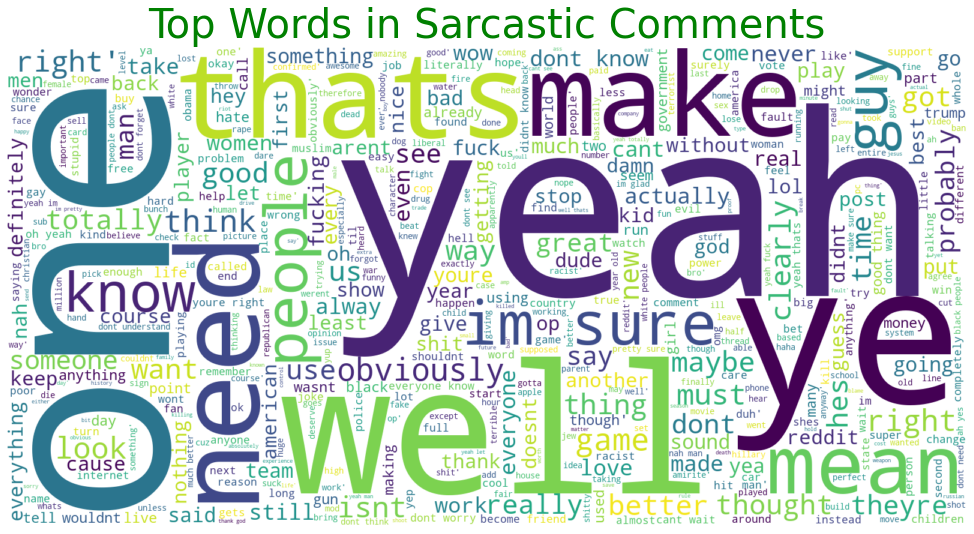

In [9]:
wordcloud_sarc = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud_sarc.generate(str(set(df_WC_sarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Sarcastic Comments", fontsize=40,color='Green')
plt.imshow(wordcloud_sarc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

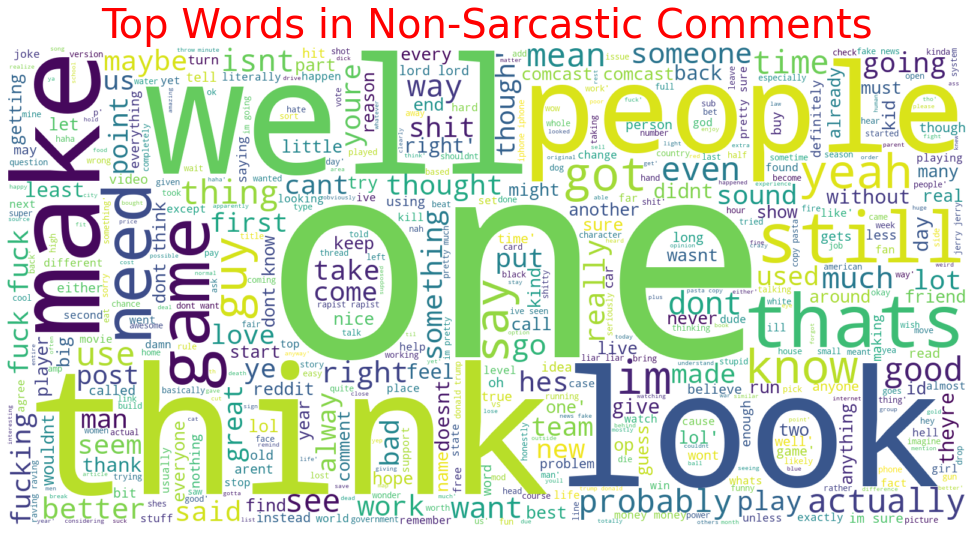

In [49]:
wordcloud_nsarc = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud_nsarc.generate(str(set(df_WC_nsarc['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Words in Non-Sarcastic Comments", fontsize=40,color='Red')
plt.imshow(wordcloud_nsarc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [ ]:
# Getting visuals using words in comments

df_w = pd.DataFrame()
df_w['num_words'] = df['comment'].apply(lambda x: len(str(x).split()))

df_w['num_unique_words']=df['comment'].apply(lambda x: len(set(str(x).split())))


df_w['num_chars'] = df['comment'].apply(lambda x: len(str(x)))

df_w['num_stopwords'] = df['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

df_w['num_punctuations'] = df['comment'].apply(lambda x: len([p for p in str(x) if p in string.punctuation]))

df_w['num_words_upper'] = df['comment'].apply(lambda x: len([u for u in str(x) if u.isupper()]))

df_w['num_words_title']=df['comment'].apply(lambda x: len([t for t in str(x) if t.istitle()]))

df_w['mean_word_len'] = df['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

Text(0.5, 1.0, 'Number of punctuations in each class')

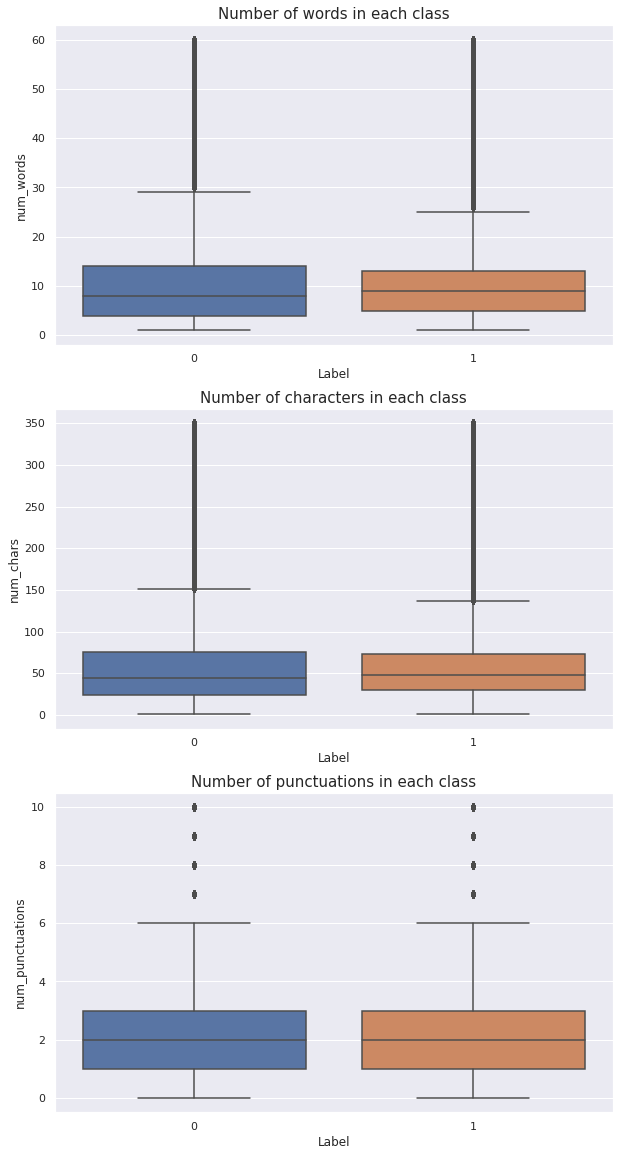

In [ ]:
# Truncate some extreme values for better visuals
df_w['label'] = df['label']
df_w['num_words'].loc[df_w['num_words']>60]=60
df_w['num_punctuations'].loc[df_w['num_punctuations']>10] = 10
df_w['num_chars'].loc[df_w['num_chars']>350]=350

f, axes =plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='label', y='num_words', data=df_w, ax=axes[0])
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_title('Number of words in each class', fontsize=15)

sns.boxplot(x='label', y='num_chars', data=df_w, ax=axes[1])
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_title('Number of characters in each class', fontsize=15)

sns.boxplot(x='label', y='num_punctuations', data=df_w ,ax=axes[2])
axes[2].set_xlabel('Label', fontsize=12)
axes[2].set_title('Number of punctuations in each class', fontsize=15)

*The words cloud give insight into the words used in sarcastic and non-sarcastic comments. Sarcasm is more about a situation dependent thing. Sometime a same word can be sarcastic and non-sarcastic depending upon the scenario. Also, I have tried boxplots in order to study more depth into words, punctuations, etc.*

### Categories Exploration

*The categories of the comments tell us the popular topics on the platform in all these years. So, this section sort out top categories about the comments. Also, if recent data is considered, this visualization would have presented a different picture.*

In [ ]:
# Dropping irrelevant columns to save runtime
df_cat = df.drop(['author', 'score', 'date', 'created_utc', 'parent_comment'], axis=1)
df_cat

,label,comment,subreddit
0,0,NC and NH.,politics
1,0,You do know west teams play against west teams...,nba
2,0,"They were underdogs earlier today, but since G...",nfl
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter
4,0,I could use one of those tools.,MaddenUltimateTeam
...,...,...,...
1262429,1,Respect your elders you little snot.,sports
1262430,1,I'm just glad they won't be using taxpayer mon...,canada
1262431,1,what.. with this awesome narration?,lost
1262432,1,He looks trustworthy.,unitedkingdom


Text(0, 0.5, 'Subreddits')

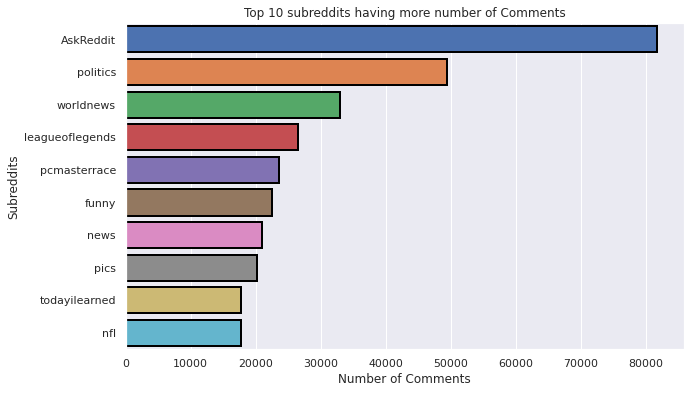

In [ ]:
# Plotting Top 10 authors for sarcastic comments
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,6))
chart = sns.countplot(y = 'subreddit', data = df_cat, 
                      order = df_cat.subreddit.value_counts().iloc[:10].index, saturation = 1, linewidth = 2, edgecolor = (0, 0, 0))
#chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 subreddits having more number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Subreddits')

*The top 10 categories are listed along with their number of comments in the dataset. Politics is pretty common in sarcasm comments. Similarly, you can see other Subreddits.*

### Distributions

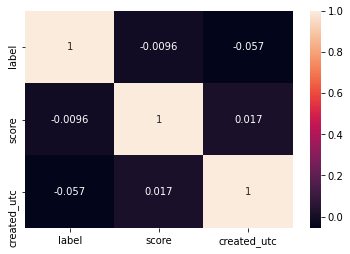

In [ ]:
# Getting correlation again to dive into distributions
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

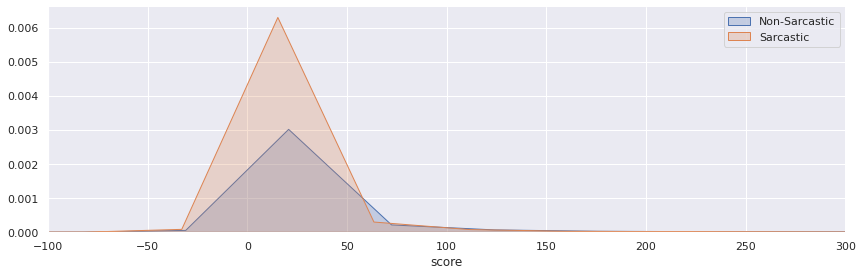

In [ ]:
# Probability Density Function
#sns.set(style='darkgrid')
plt.figure()
g = sns.FacetGrid(data=df, hue='label', aspect=3, height=4)
g.map(sns.kdeplot, 'score', shade=True)
g.set(xlim=(-100, 300))
plt.legend(labels=['Non-Sarcastic', 'Sarcastic'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


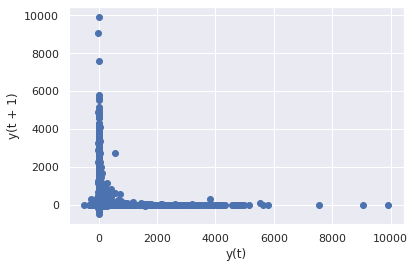

In [ ]:
# Checking if score distribution is random or not
from pandas.plotting import lag_plot

lag_plot(df['score'])

*The correlation matrix again just to emphasize its importance in the dataset. Then, a density distribution of sarcasm vs non-sarcasm score. Then a final lag plot just to check score column is random or not. The plot shows that it's totally random. A lot of other distributions can be plotted but not needed. Emphasizing on important columns, I have tried to plot different visualizations to get better understanding about the data.*

# **I hope this helps in your ML models development :)**